# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key - reads api_keys within the same folder; need ot figure out to read a single file from two different directories
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# using this to generate the list of cities  below
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# Initialize lists and variables for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# #for testing we are going to use a smaller set of names; drop this once the code is good
# cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# # Print the city count to confirm sufficient count
len(cities)


564

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
#Home 40.0416, 75.3699

# Save config information from  https://openweathermap.org/current#data
# Save config information
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
units = "Imperial" #metric

# Comment out after testing
#city_testing = "New York" # for testing

# Build query URL
#url = base_url + city_testing
url = base_url


#print(url)

In [64]:
# Initialize lists to loop through cities data and make api calls

# set up lists to hold reponse info
city_name = []
city_number = []
latitude = []
longitude = []
temperature = []
humidity = []
wind = []
clouds = []
country = []
date = []

In [65]:
# Initialize counters for loops through multiple cities
counter = 0
set_counter = 1         

counter_cities_analyzed = 0

counter_response_errors  = 0

In [66]:
# # For testing
# counter_url_print = 1

# for city in cities[0:19]:
#     counter_url_print
#     print(str(counter_url_print) + ": " + url + city)
#     counter_url_print += 1

In [67]:
# # for testing

# u = "http://api.openweathermap.org/data/2.5/weather?appid=2126a8dfc46686055d87f1210e58a355&units=imperial&q=albany"
# weather_response = requests.get(u)
# data = weather_response.json()


In [68]:
# # For Testing
# data

In [69]:
# # For Testing
# city_name.append(data['name'])
# city_number.append(data['id'])
# lat.append(data['coord']['lat'])
# lon.append(data['coord']['lon'])
# temp.append(data['main']['temp_max'])
# humidity.append(data['main']['humidity'])
# wind.append(data['wind']['speed'])
# clouds.append(data['clouds']['all'])
# country.append(data['sys']['country'])
# date.append(data['dt'])

In [70]:
# API only allows 1,000 trips per day; therefore a mechanism to limit the number of requests for testing 
# KM Cooper helped me with the try and except logic
# for city in cities[0:52]: # to test a limited number of records
for city in cities:
    url_city = url + city
    weather_response = requests.get(url_city)
    data = weather_response.json()

    try:
        #pause for 30 seconds for every 50 requests  to allow for processing
        if counter > 49: # comment out when testing
            counter = 0
            set_counter +=1
            time.sleep(30)
        
        # Read JSON and append values to lists
        city_name.append(data['name'])
        city_number.append(data['id'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        temperature.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind.append(data['wind']['speed'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
            
        print(f"Processing {counter} of Set {set_counter} | {city}")

        # Increment the count for the records processed 
        counter += 1
        counter_cities_analyzed += 1

    except (KeyError, IndexError):

        #For cities without API data
        print(f"{city} not found...")
        counter_response_errors += 1

Processing 0 of Set 1 | malakal
Processing 1 of Set 1 | tazovskiy
Processing 2 of Set 1 | mahebourg
Processing 3 of Set 1 | port blair
Processing 4 of Set 1 | saint-philippe
illoqqortoormiut not found...
tawkar not found...
Processing 5 of Set 1 | figeac
Processing 6 of Set 1 | mandalgovi
Processing 7 of Set 1 | mataura
Processing 8 of Set 1 | kudahuvadhoo
marcona not found...
Processing 9 of Set 1 | san quintin
Processing 10 of Set 1 | upernavik
Processing 11 of Set 1 | butaritari
Processing 12 of Set 1 | luancheng
Processing 13 of Set 1 | roald
Processing 14 of Set 1 | port-cartier
Processing 15 of Set 1 | cidreira
Processing 16 of Set 1 | touros
Processing 17 of Set 1 | iskilip
Processing 18 of Set 1 | faanui
Processing 19 of Set 1 | torbay
Processing 20 of Set 1 | atherton
Processing 21 of Set 1 | zeya
Processing 22 of Set 1 | lakes entrance
Processing 23 of Set 1 | anchorage
Processing 24 of Set 1 | mayo
Processing 25 of Set 1 | hermanus
Processing 26 of Set 1 | chapais
Processing

In [71]:
#Upon completion create summary values         
print ("- - - - - - - - - - - - - - - - - - - - - - - - - - - - -")        
print (f"Count of Cities Analyzed: {counter_cities_analyzed}")
print (f"Count of Cities Not Found: {counter_response_errors}")
print ("- - - - - - - - - - - - - - - - - - - - - - - - - - - - -")        

- - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Count of Cities Analyzed: 520
Count of Cities Not Found: 44
- - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [72]:
#Create Data Frame
city_weather = pd.DataFrame({ "City": city_name
                       , "Latitude"   : latitude
                       , "Longitude"  : longitude
                       , "Temp" : temperature
                       , "Humidity"        : humidity
                       , "Clouds"  : clouds
                       , "Wind Speed"      : wind
                       , "Country"    : country
                       , "Date"   : date})

city_weather.index.name = "City_ID"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#Export to .csv 
output_data_file = "../output_data/cities.csv"
output_path = os.path.join(output_data_file )
city_weather.to_csv(output_path,index="False")
city_weather

,City,Latitude,Longitude,Temp,Humidity,Clouds,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Malakal,9.5334,31.6605,93.63,16,100,7.72,SS,1668175038
1,Tazovsky,67.4667,78.7000,-5.49,94,5,8.88,RU,1668175038
2,Mahébourg,-20.4081,57.7000,77.29,73,75,5.75,MU,1668175038
3,Port Blair,11.6667,92.7500,82.44,78,40,2.30,IN,1668174911
4,Saint-Philippe,-21.3585,55.7679,78.39,79,52,7.05,RE,1668175039
...,...,...,...,...,...,...,...,...,...
515,Rāmshīr,30.8946,49.4092,83.35,34,100,12.62,IR,1668175498
516,Yenagoa,4.9247,6.2642,86.65,62,100,2.59,NG,1668175498
517,Vidalia,32.2177,-82.4135,69.91,94,100,16.11,US,1668175499


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
#Find cities > 100% Humidity
city_humidities = len(city_weather[(city_weather["Humidity"] > 100) ])

if city_humidities  > 0:
    print (f"city_humidities: {city_humidities}")

In [75]:
#  Get the indices of cities that have humidity over 100%.
#Select only cities with humidity less than or equal to 100
clean_city_data = city_weather.loc[ (city_weather["Humidity"] <= 100 ) , :]
len(clean_city_data)

520

In [76]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Specific Date
from datetime import date as dt

date = pd.to_datetime(clean_city_data["Date"]).dt.date
specific_date = date[0:1]

for item in specific_date:
    date_analysis = str(item)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

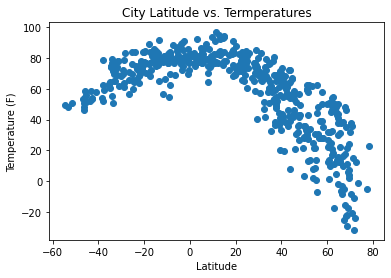

In [78]:
plt.scatter(city_weather["Latitude"], city_weather["Temp"], marker="o")

plt.title("City Latitude vs. Termperatures")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid=True

# Save the plot and display it
plt.savefig("../Images/temps.png")
plt.show()

## Latitude vs. Humidity Plot

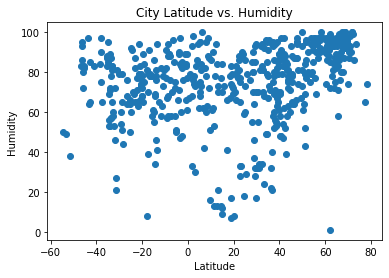

In [79]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid=True

# Save the plot and display it
plt.savefig("../Images/humiity.png")
plt.show()

## Latitude vs. Cloudiness Plot

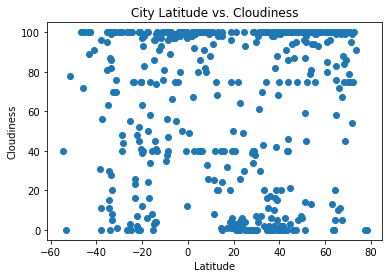

In [80]:
plt.scatter(city_weather["Latitude"], city_weather["Clouds"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid=True

# Save the plot and display it
plt.savefig("../Images/clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

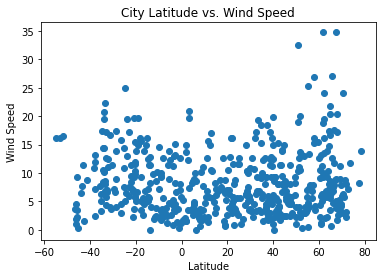

In [82]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid=True

# Save the plot and display it
plt.savefig("../Images/wind.png")
plt.show()

## Linear Regression

In [83]:
north_df = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) > 0, :]
south_df = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) < 0, :]

In [86]:
north_df.head()


,City,Latitude,Longitude,Temp,Humidity,Clouds,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Malakal,9.5334,31.6605,93.63,16,100,7.72,SS,1668175038
1,Tazovsky,67.4667,78.7000,-5.49,94,5,8.88,RU,1668175038
3,Port Blair,11.6667,92.7500,82.44,78,40,2.30,IN,1668174911
5,Arrondissement de Figeac,44.7500,1.9167,66.76,60,3,7.76,FR,1668175039
6,Mandalgovi,45.7625,106.2708,20.73,64,0,5.28,MN,1668175039


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

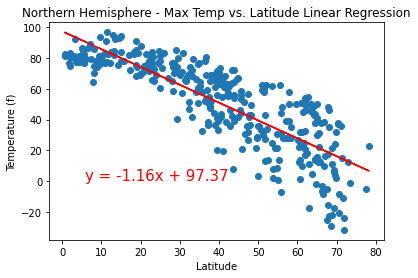

In [87]:
# Add the linear regression equation and line to plot
x_values = north_df['Latitude']
y_values = north_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

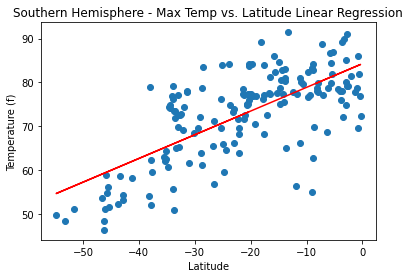

In [88]:
# Add the linear regression equation and line to plot
x_values = south_df['Latitude']
y_values = south_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

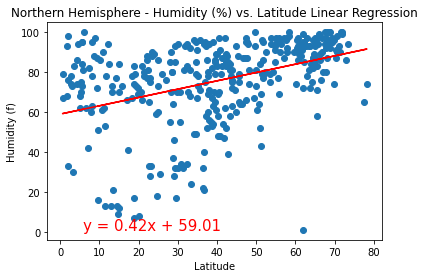

In [89]:
# Add the linear regression equation and line to plot
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (f)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

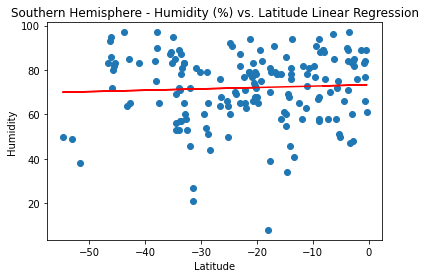

In [90]:
# Add the linear regression equation and line to plot
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

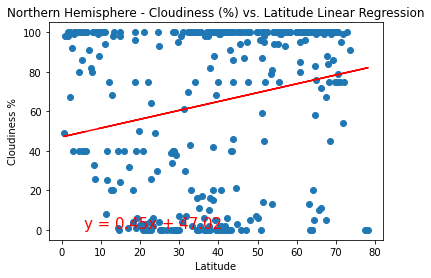

In [91]:
# Add the linear regression equation and line to plot
x_values = north_df['Latitude']
y_values = north_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

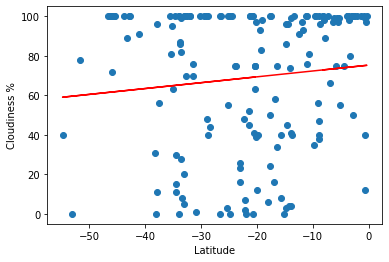

In [92]:
# Add the linear regression equation and line to plot
x_values = south_df['Latitude']
y_values = south_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

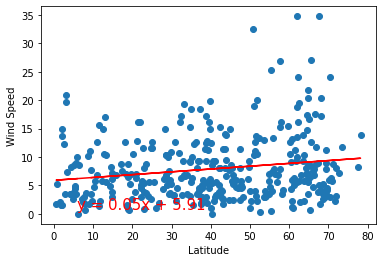

In [93]:
# Add the linear regression equation and line to plot
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

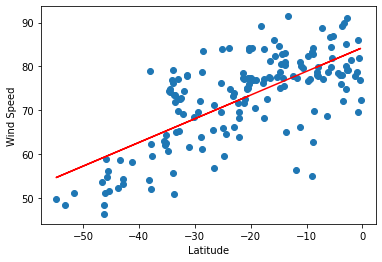

In [95]:
# Add the linear regression equation and line to plot
x_values = south_df['Latitude']
y_values = south_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()